# 주택 가격 예측 : 회기 문제
**회기 문제(regression problem)** : 연속적인 값을 예측하는 문제  
ex) 기상 데이터가 주어졌을 때 내일 기온을 예측하거나, 소프트웨어 명세가 주어졌을 때 소프트웨어 프로젝트가 완료될 시간을 예측.
cf) 로지스틱 회기(logistric regression)은 회기 알고리즘이 아닌 **분류 알고리즘**

# 보스턴 주택 가격 데이터셋
- 데이터 포인트 506개
- 훈련 샘플 404개
- 테스트 샘플 102개
- 입력 데이터에 있는 각 특성(feature)은 스케일이 서로 다름. (특성 => ex) 범죄율)
- 어떤 특성 값은 0과 1 사이 값, 다른 특성 값은 1과 12 or 1과 100 사이 값을 갖음.


In [30]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [9]:
train_data.shape

(404, 13)

In [10]:
test_data.shape

(102, 13)

- 훈련 샘플 404개
- 테스트 샘플 102개
- 수치 특성 13개
- 수치 특성 ex) 1인당 범죄율, 주택당 평균 방의 개수, 고속도로 접근성 등
- 타깃 : 주택의 중간 가격 (천 달러 단위)

In [11]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

# 데이터 준비
- 상이한 스케일을 가진 데이터 => 특성별로 정규화
- 입력 데이터에 있는 각 특성에 대해서 특성의 평균을 빼고 표준편차로 나눔.
- 특성의 중앙이 0 근처에 맞춰지고 표준 편차가 1이 됨.
- 넘파이 사용하면 간단.
- **테스트 데이터를 정규화 할 때 사용한 겂이 훈련 데이터에서 계산한 값임을 주목하자**
- 머신 러닝 작업 과정에서 절대로 테스트 데이터에서 계산한 어떤 값도 사용해서는 안됨.

In [12]:
mean = train_data.mean(axis =0) #각 열에 대해서 평균
train_data -=mean
std = train_data.std(axis=0) # 각 열에 대해서 표준편차
train_data /=std

test_data -= mean
test_data /=std

# 모델 구성
- 샘플 개수가 적기 때문에 64개 유닛을 가진 2개의 은닉 층으로 작은 네트워크를 구성
- 일반적으로 훈련 데이터의 개수가 적을수록 과대적합이 더 쉽게 일어나므로 작은 모델을 사용하는 것이 과대적합을 피하는 한 방법.

In [13]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
  return model

- **네트워크 마지막 층**은 하나의 유닛을 가지고 있고 활성화 함수가 없음.(선형층)
- 전형적인 스칼라 회귀를 위한 구성. (스칼라 회귀 : 하나의 연속적인 값을 예측하는 회귀)
- 활성화 함수를 적용하면 출력 값의 범위를 제한 함. (sigmoid 활성 함수를 적용하면 출력 값의 범위가 0~1 이됨.)
- 마지막 층을 순수 선형으로 구성함으로 네트워크가 어떤 범위의 값이라도 예측하도록 함.
- mse 손실 함수를 사용하여 컴파일
- mse : 평균 제곱 오차(mean squared error) => 예측과 타깃 사이의 거리의 제곱. 
- 회귀 문제에서 손실 함수로 mse를 주로 사용함.
- 훈련하는 동안 평균 절대 오차(Mean Absolute Error, MAE)를 측정.
- MAE는 예측과 타깃 사이 거리의 절댓값을 나타냄.
- MAE가 0.5면 예측이 평균적으로 500달러 차이가 난다는 뜻.

# K- 겹 검증을 사용한 훈련 검증(K-fold cross-validation)
- 데이터 포인트가 적으면 검증 세트도 매우 작아짐.
- 결국 검증 세트와 훈련 세트로 어떤 데이터 포인트가 선택되었는지에 따라 검증 점수가 크게 달라짐.
- 검증 세트의 분할에 대한 검증 점수의 분산이 높게되고 모델을 제대로 평가 했는지 신뢰를 할 수 없음.
- **K-겹 교차 검증** : 데이터를 K개 분할(fold)로 나누고, K 개의 모델을 각각 만들어 K-1 개의 분할에서 훈련하고 나머지 분할에서 평가하는 방법. (K는 보통 4 or 5)
- 모델의 검증 점수는 K개의 검증 점수 평균이 됨.


In [14]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # 검증 세트로 모델 평가
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [16]:
all_scores

[1.9740409851074219, 2.685685634613037, 2.59903883934021, 2.466611862182617]

In [17]:
np.mean(all_scores)

2.4313443303108215

검증 세트가 다르므로 확실히 검증 점수가 1.97에서 2.68까지 변화가 큽니다. 평균값(2.43)이 각각의 점수보다 훨씬 신뢰할 만한 점수입니다. 이것이 K-겹 교차 검증의 핵심입니다. 이 예에서는 평균적으로 2,400달러 정도 차이가 납니다. 주택 가격의 범위가 10,000달러에서 50,000달러 사이인 것을 감안하면 비교적 큰 값입니다.

신경망을 조금 더 오래 500 에포크 동안 훈련해 보죠. 각 에포크마다 모델이 얼마나 개선되는지 기록하기 위해 훈련 루프를 조금 수정해서 에포크의 검증 점수를 로그에 저장하겠습니다:

In [19]:
from keras import backend as K

# 메모리 해제
K.clear_session()

In [24]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


그다음 모든 폴드에 대해 에포크의 MAE 점수의 평균을 계산합니다:

In [25]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

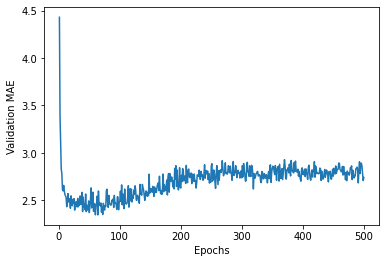

In [26]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

- 곡선의 다른 부분과 스케일이 많이 다른 첫 10개 데이터 포인트를 제외시킵니다.
- 부드러운 곡선을 얻기 위해 각 포인트를 이전 포인트의 지수 이동 평균으로 대체합니다.

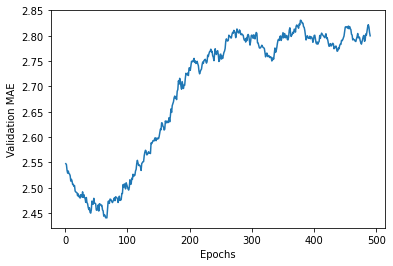

In [27]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


이 그래프를 보면 검증 MAE가 80번째 에포크 이후에 줄어드는 것이 멈추었습니다. 이 지점 이후로는 과대적합이 시작됩니다.

모델의 다른 매개변수에 대한 튜닝이 끝나면(에포크 수뿐만 아니라 은닉층의 크기도 조절할 수 있습니다) 모든 훈련 데이터를 사용하고 최상의 매개변수로 최종 실전에 투입될 모델을 훈련시킵니다. 그다음 테스트 데이터로 성능을 확인합니다:

In [42]:
# 새롭게 컴파인된 모델을 얻습니다
model = build_model()
# 전체 데이터로 훈련시킵니다
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 34.6224 - mae: 4.1794


In [43]:
test_mae_score

4.17943811416626

4179달러 차이가 남..

정리
다음은 이 예제에서 배운 것들입니다.

- 회귀는 분류에서 사용했던 것과는 다른 손실 함수를 사용합니다. 
- 평균 제곱 오차(MSE)는 회귀에서 자주 사용되는 손실 함수입니다.
- 비슷하게 회귀에서 사용되는 평가 지표는 분류와 다릅니다.
- 당연히 정확도 개념은 회귀에 적용되지 않습니다. 
- 일반적인 회귀 지표는 평균 절대 오차(MAE)입니다.
- 입력 데이터의 특성이 서로 다른 범위를 가지면 전처리 단계에서 각 특성을 개별적으로 스케일 조정해야 합니다.
- 가용한 데이터가 적다면 K-겹 검증을 사용하는 것이 신뢰할 수 있는 모델 신뢰있게 평가 방법입니다.
- 가용한 훈련 데이터가 적다면 과대적합을 피하기 위해 은닉층의 수를 줄인 모델이 좋습니다(일반적으로 하나 또는 두 개).